In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf

### Question 1: Using yfinance to extract Tesla stock data

In [58]:
tesla = yf.Ticker("TSLA")

In [59]:
tesla_data = tesla.history(period="max")

In [60]:
tesla_data.reset_index(inplace=True)

In [61]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [62]:
tesla_data.shape

(2994, 8)

In [63]:
tesla_data.to_csv("Tesla_stock.csv")

### Question 2: Using Webscrapping to Extract Tesla Revenue Data

In [25]:
url = "https://finance.yahoo.com/quote/TSLA/history?p=TSLA"

data  = requests.get(url).text

In [26]:
soup = BeautifulSoup(data, 'html5lib')

In [ ]:
tesla_revenue = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    tesla_revenue = tesla_revenue.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    

In [ ]:
tesla_revenue.tail()

### Question 3: Using yfinance to extract GameStop stock data

In [45]:
game_stop = yf.Ticker("GME")

In [46]:
gme_data = game_stop.history(period="max")

In [48]:
gme_data.reset_index(inplace=True)

In [49]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850828,6.864294,6.682503,6.733000,2755400,0.0,0.0
2,2002-02-15,6.733002,6.749834,6.632007,6.699337,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463682,6.648839,6.413184,6.648839,1723200,0.0,0.0


In [50]:
gme_data.shape

(5102, 8)

In [51]:
gme_data.to_csv("GameStop_stock.csv")

### Question 4: Using Webscrapping to Extract GameStop Revenue Data

In [81]:
url = "https://finance.yahoo.com/quote/GME/history?p=GME"

In [82]:
data  = requests.get(url).text

In [83]:
soup = BeautifulSoup(data, 'html5lib')

In [ ]:
gme_revenue = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])


for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    gme_revenue = gme_revenue.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    

In [ ]:
gme_revenue.tail()

### Question 5: Plot the Tesla Stock Graph

<AxesSubplot:title={'center':'Graph of Tesla Stock'}, xlabel='Date'>

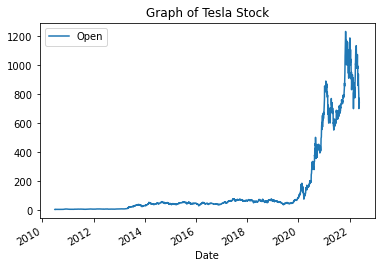

In [64]:
tesla_data.plot(x="Date", y="Open",title='Graph of Tesla Stock')

### Question 6: Plot the GameStop Stock Graph

<AxesSubplot:title={'center':'Graph of GameStop Stock'}, xlabel='Date'>

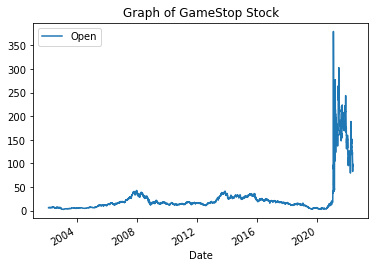

In [57]:
gme_data.plot(x="Date", y="Open",title='Graph of GameStop Stock')